In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('combine_19_20_21_sale.xlsx')

In [4]:
df.head()

,Unnamed: 0,Created Date,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income
0,0,2019-01-03,68,90,42,6583.000000,100885.000000,100885.0
1,1,2019-01-04,69,85,46,6542.500000,112823.177778,25694.2
2,2,2019-01-05,53,82,22,11057.800000,92705.000000,92705.0
3,3,2019-01-06,58,16,12,5815.000000,41483.776667,14062.0
4,4,2019-01-07,60,89,63,7918.583333,108119.473333,109814.0


In [5]:
df=df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.columns

Index(['Created Date', 'TMAX', 'Completed_Jobs', 'tech_count', 'Avg_Sales',
       'Zip_income', 'Income'],
      dtype='object')

In [7]:
df['year'] = df['Created Date'].dt.year
df['month'] = df['Created Date'].dt.month
df['day'] = df['Created Date'].dt.month


df['weekday'] = df['Created Date'].dt.dayofweek

df['quarter'] = df['Created Date'].dt.quarter

In [8]:
df=df.drop(['Created Date'],axis=1)

In [9]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [10]:
encode(df,'month',12)
encode(df,'day',365)
encode(df,'weekday',7)
encode(df,'quarter',4)

,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income,year,month,day,weekday,quarter,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,quarter_sin,quarter_cos
0,68,90,42,6583.000000,100885.000000,100885.00,2019,1,1,3,1,0.500000,0.866025,0.017213,0.999852,0.433884,-0.900969,1.000000e+00,6.123234e-17
1,69,85,46,6542.500000,112823.177778,25694.20,2019,1,1,4,1,0.500000,0.866025,0.017213,0.999852,-0.433884,-0.900969,1.000000e+00,6.123234e-17
2,53,82,22,11057.800000,92705.000000,92705.00,2019,1,1,5,1,0.500000,0.866025,0.017213,0.999852,-0.974928,-0.222521,1.000000e+00,6.123234e-17
3,58,16,12,5815.000000,41483.776667,14062.00,2019,1,1,6,1,0.500000,0.866025,0.017213,0.999852,-0.781831,0.623490,1.000000e+00,6.123234e-17
4,60,89,63,7918.583333,108119.473333,109814.00,2019,1,1,0,1,0.500000,0.866025,0.017213,0.999852,0.000000,1.000000,1.000000e+00,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,81,222,126,3494.939333,210099.110000,210099.11,2021,4,4,4,2,0.866025,-0.500000,0.068802,0.997630,-0.433884,-0.900969,1.224647e-16,-1.000000e+00
722,68,168,75,4079.521639,119775.950000,119775.95,2021,5,5,5,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.000000e+00
723,69,202,124,3481.447857,230699.430000,230699.43,2021,5,5,2,2,0.500000,-0.866025,0.085965,0.996298,0.974928,-0.222521,1.224647e-16,-1.000000e+00
724,68,109,75,4314.042857,112431.950000,112431.95,2021,5,5,5,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.000000e+00


In [11]:
df=df.drop(['month', 'day', 'weekday', 'quarter'],axis=1)

In [12]:
df['year'] = df['year'].map({2019: 0, 2020: 1,2021:2})

In [13]:
df['f1']=np.abs(df['Completed_Jobs'])*np.abs(df['Zip_income'])
df['f2']=np.sqrt(df['Completed_Jobs']**3)*np.abs(df['Avg_Sales'])
df['f3']=np.abs(np.sqrt(df['Completed_Jobs']) - np.sqrt(df['tech_count']))
df['f4']=np.log(np.sqrt(df['Completed_Jobs'])*df['TMAX']**3)

In [14]:
df1=df[['f1', 'f2','f3', 'f4','year',  'month_cos',  'quarter_sin','Income']]

In [15]:
df1=df1.drop_duplicates(ignore_index=True)

In [16]:
train=df1[0:600]
test=df1[600:]

In [17]:
y=train['Income']
X=train.drop(['Income'],axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.neighbors import KNeighborsRegressor

In [20]:
# applying KNN algoritham with K=1(worst case)
reg_model=KNeighborsRegressor(n_neighbors=1)
reg_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [21]:
# Model score on test data set 
# regression metric is r2_score
reg_model.score(X_train,y_train)

1.0

In [22]:
# Model performance score on test data set
reg_model.score(X_test,y_test)

0.3899951106607882

In [23]:
y_=test['Income']
X_=test.drop(['Income'],axis=1)

In [24]:
reg_model.score(X_,y_)

-0.009872375234774022

# Hyperparameter tuning

In [25]:
from sklearn.model_selection import cross_val_score

In [29]:
# for hyper parameter (k) tuning we take k value in the range 1 to 100

accuracy = []


for i in range(1,40):
    
    reg_model = KNeighborsRegressor(n_neighbors=i,weights='distance')
    score=cross_val_score(reg_model,X,y,cv=10,)
    accuracy.append(score.mean())

Text(0, 0.5, 'Accuracy')

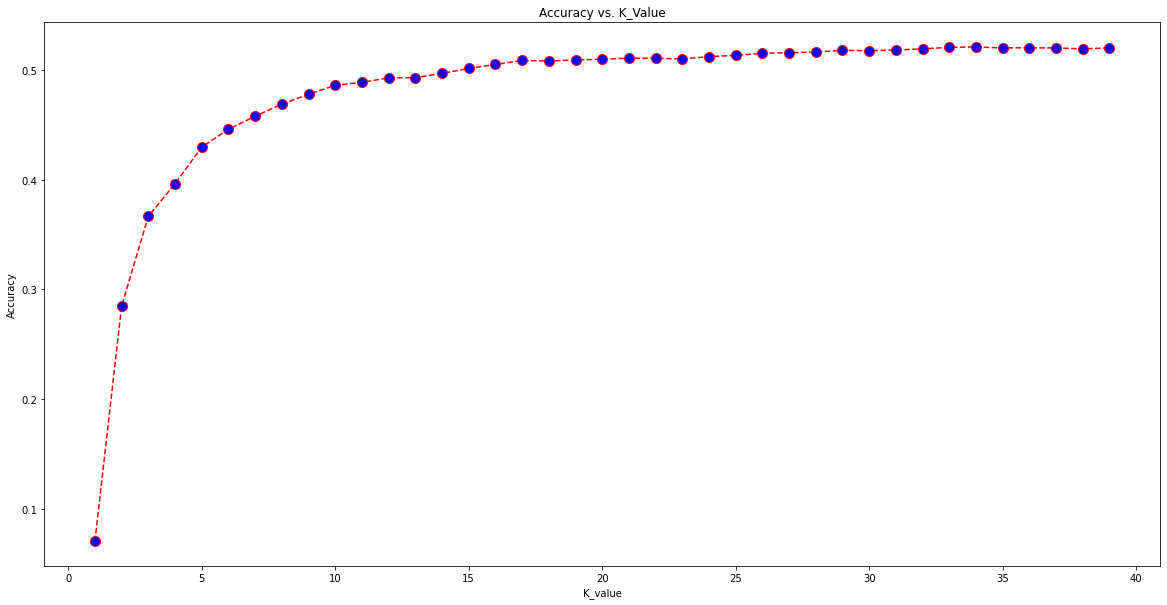

In [30]:
plt.figure(figsize=(20,10))
plt.plot(range(1,40),accuracy,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs. K_Value')
plt.xlabel('K_value')
plt.ylabel('Accuracy')

In [31]:
#Now we can apply KNN with k=17 to check performance

tuned_reg_model= KNeighborsRegressor(n_neighbors=22)

In [32]:
tuned_reg_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=22)

In [33]:
# performance of model on train dataset
tuned_reg_model.score(X_train,y_train)

0.6815960322008443

In [34]:
# performance of model on test dataset
tuned_reg_model.score(X_test,y_test)

0.7160842723463636

In [35]:
tuned_reg_model.score(X_,y_)

0.6815539209983723

In [36]:
# prediction 

y_pred=tuned_reg_model.predict(X_)

In [37]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred})

<AxesSubplot:>

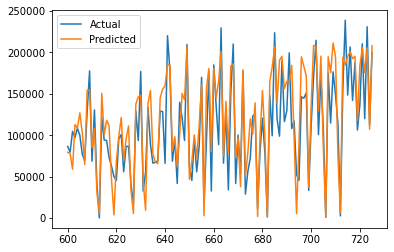

In [38]:
comp.plot()

In [39]:
from sklearn import metrics

In [40]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred))

RMSE: 32018.024344822155
MAE: 24953.864314574315
